In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Customertravel.csv")

In [3]:
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
data.shape

(954, 7)

In [5]:
data.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [6]:
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [8]:
data["FrequentFlyer"].value_counts()

FrequentFlyer
No           608
Yes          286
No Record     60
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of FrequentFlyer')

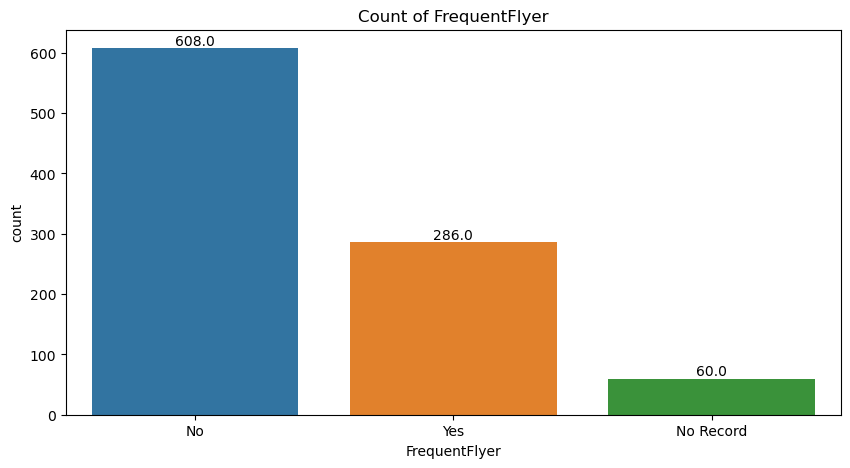

In [9]:
# Creating counter plot with count values as annotations on top of each bar.
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x="FrequentFlyer")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title("Count of FrequentFlyer")


In [10]:
data["AccountSyncedToSocialMedia"].value_counts()

AccountSyncedToSocialMedia
No     594
Yes    360
Name: count, dtype: int64

In [11]:
data["BookedHotelOrNot"].value_counts()

BookedHotelOrNot
No     576
Yes    378
Name: count, dtype: int64

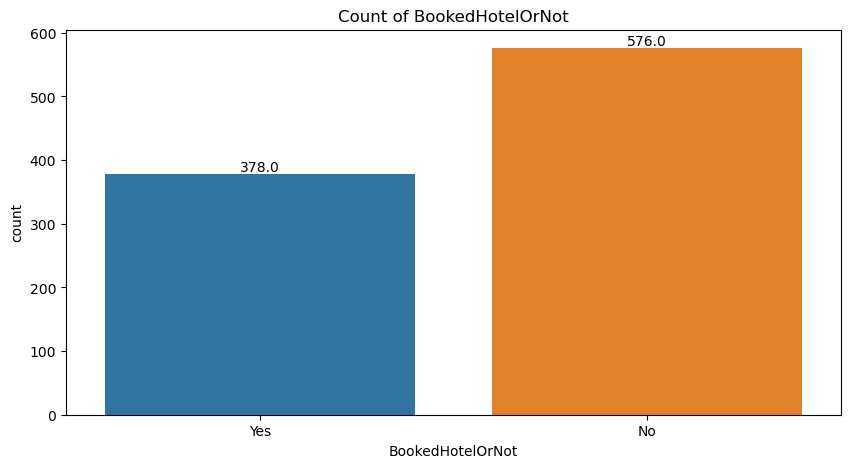

In [12]:
# Creating counter plot with count values as annotations on top of each bar.
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x="BookedHotelOrNot")
plt.title("Count of BookedHotelOrNot")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()


In [13]:
data["AnnualIncomeClass"].value_counts()

AnnualIncomeClass
Middle Income    409
Low Income       386
High Income      159
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of AnnualIncomeClass ')

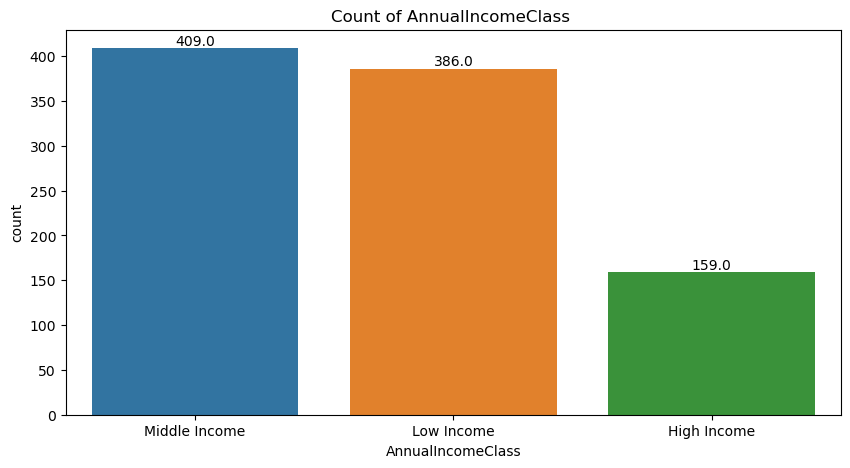

In [14]:
# Creating counter plot with count values as annotations on top of each bar.
plt.figure(figsize =(10,5))
ax=sns.countplot(data=data, x="AnnualIncomeClass")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
    
plt.title("Count of AnnualIncomeClass ")

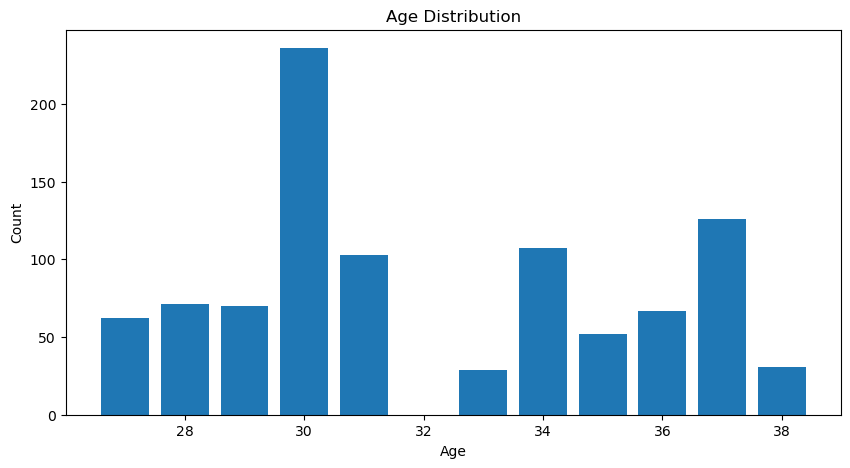

In [15]:
age_counts = data['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']

# Creating a bar plot
plt.figure(figsize=(10, 5))
plt.bar(age_counts['Age'], age_counts['Count'], )
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


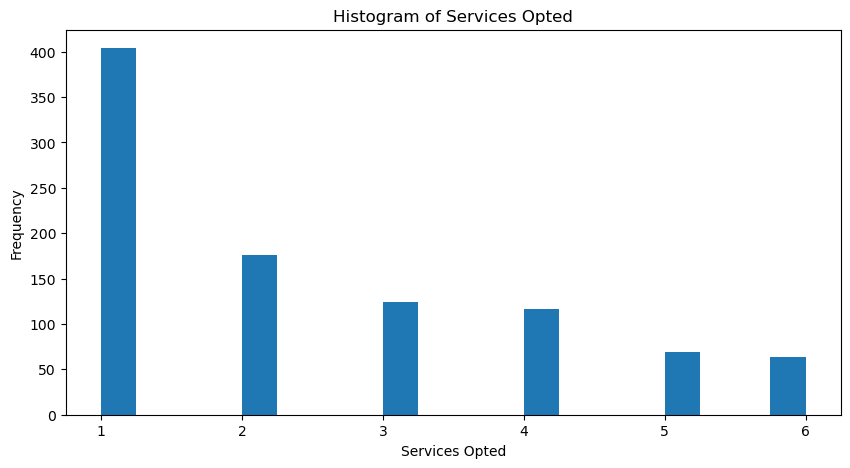

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(data['ServicesOpted'], bins=20)
plt.xlabel("Services Opted")
plt.ylabel("Frequency")
plt.title("Histogram of Services Opted")
plt.show()

Axes(0.125,0.11;0.775x0.77)


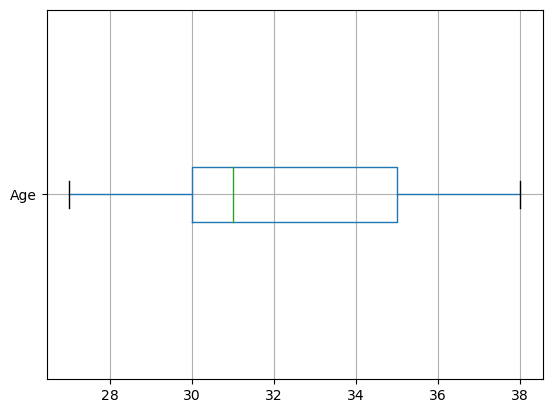

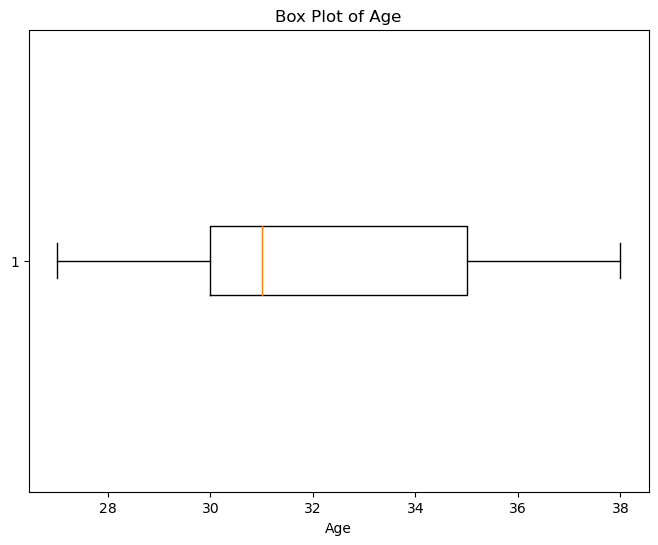

In [17]:
print(data.boxplot(('Age'),vert=False))
        #OR

age_data = data['Age']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(age_data, vert=False)  
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

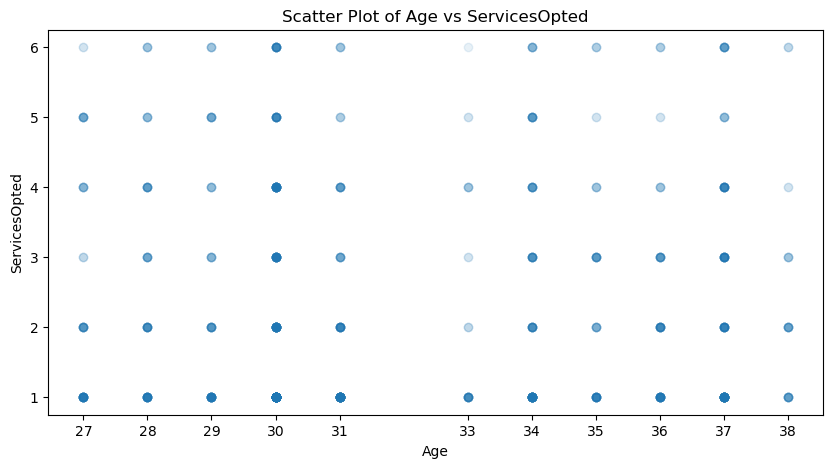

In [18]:
x = data['Age']
y = data['ServicesOpted']

# Create a scatter plot
plt.figure(figsize=(10, 5)) 
plt.scatter(x, y, alpha=0.1)  
plt.xlabel('Age')
plt.ylabel('ServicesOpted')
plt.title('Scatter Plot of Age vs ServicesOpted')

# Set X-axis ticks to display all unique age values
plt.xticks(data['Age'].unique())

plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


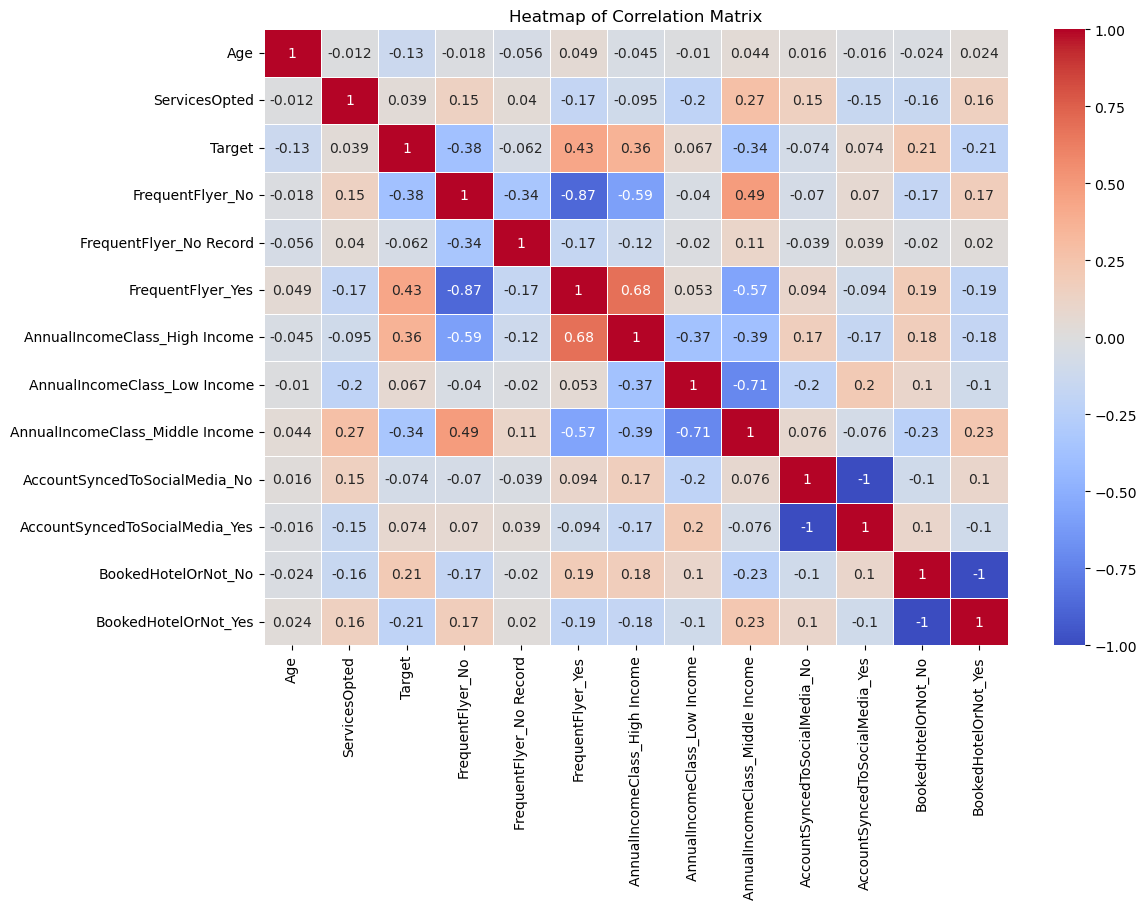

In [20]:
df = pd.DataFrame(data)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [21]:
correlation=df_encoded.corr()
correlation = correlation.style.background_gradient(cmap='coolwarm')
correlation

,Age,ServicesOpted,Target,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_No,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_No,BookedHotelOrNot_Yes
Age,1.000000,-0.012422,-0.131534,-0.018485,-0.056360,0.049261,-0.044972,-0.010295,0.044076,0.016367,-0.016367,-0.024281,0.024281
ServicesOpted,-0.012422,1.000000,0.038646,0.145640,0.039734,-0.173881,-0.095485,-0.204499,0.274719,0.148655,-0.148655,-0.155886,0.155886
Target,-0.131534,0.038646,1.000000,-0.379391,-0.062015,0.430973,0.362747,0.067348,-0.339959,-0.073831,0.073831,0.206055,-0.206055
FrequentFlyer_No,-0.018485,0.145640,-0.379391,1.000000,-0.343416,-0.867378,-0.592828,-0.039998,0.486096,-0.070015,0.070015,-0.174267,0.174267
FrequentFlyer_No Record,-0.056360,0.039734,-0.062015,-0.343416,1.000000,-0.169512,-0.115857,-0.020028,0.107109,-0.038824,0.038824,-0.019654,0.019654
FrequentFlyer_Yes,0.049261,-0.173881,0.430973,-0.867378,-0.169512,1.000000,0.683471,0.052584,-0.566837,0.094042,-0.094042,0.193281,-0.193281
AnnualIncomeClass_High Income,-0.044972,-0.095485,0.362747,-0.592828,-0.115857,0.683471,1.000000,-0.368667,-0.387417,0.168275,-0.168275,0.178267,-0.178267
AnnualIncomeClass_Low Income,-0.010295,-0.204499,0.067348,-0.039998,-0.020028,0.052584,-0.368667,1.000000,-0.714139,-0.204168,0.204168,0.100180,-0.100180
AnnualIncomeClass_Middle Income,0.044076,0.274719,-0.339959,0.486096,0.107109,-0.566837,-0.387417,-0.714139,1.000000,0.075768,-0.075768,-0.233598,0.233598
AccountSyncedToSocialMedia_No,0.016367,0.148655,-0.073831,-0.070015,-0.038824,0.094042,0.168275,-0.204168,0.075768,1.000000,-1.000000,-0.100104,0.100104
